In [4]:
!pip3 install numpy
!pip3 install pandas
!pip3 install plotly
!pip3 install streamlit
!pip3 install protobuf
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 17.6 MB/s eta 0:00:0000:0100:01
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' com

2022-06-08 19:26:11.981 
  command:

    streamlit run /Users/hyunjison/Library/Python/3.8/lib/python/site-packages/ipykernel_launcher.py [ARGUMENTS]


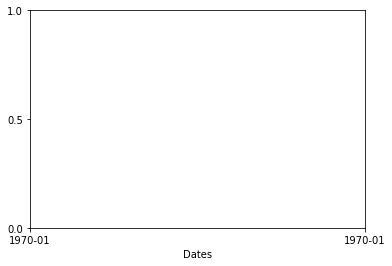

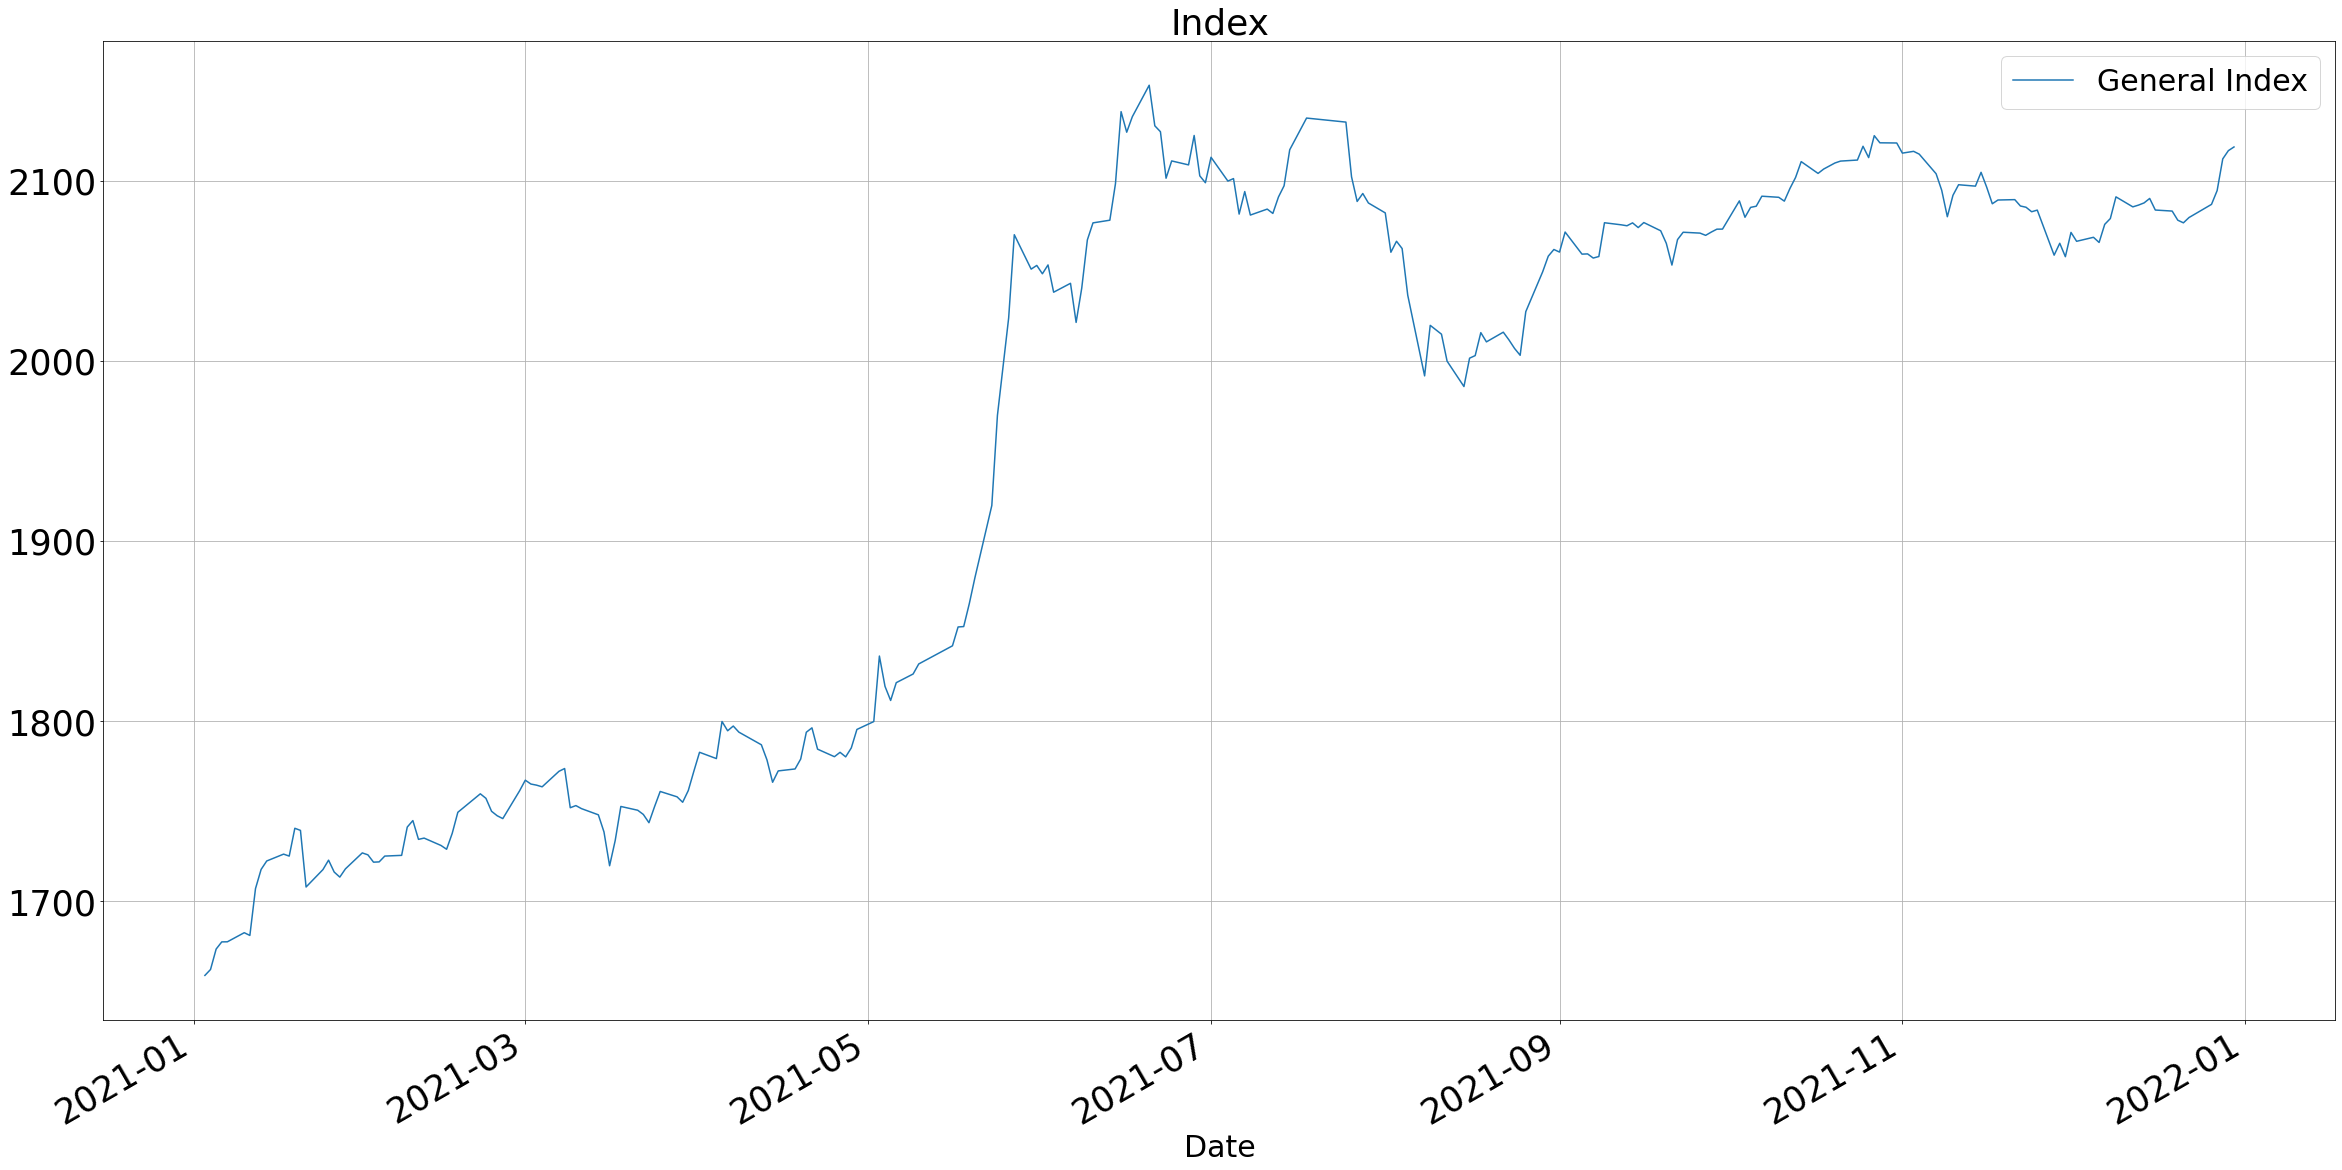

In [5]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from PIL import Image

import matplotlib.pyplot as plt
import json
import matplotlib.dates as mdates

# Set structure of the site
header = st.container()
crisis_indicator = st.container()
dataset = st.container()


# Cache selected dataset
@st.cache
def get_data(filename):
    stock_data = pd.read_csv(filename, sep=',')
    return stock_data


image = Image.open('resources/Three Buttons.png')
st.sidebar.image(image, width=300, output_format='PNG')


with header:
    st.title('Welcome to the irrationality project!')
    st.text('In this project I look into the implementation of irrationality')
    st.text('into the portfolio allocation process.')
    st.text('')
    st.text('Please note that the data shown is not the actual data.')
    st.text('They are to be used for illustrative purposes only.')
    st.text('')


with crisis_indicator:
    st.header("1. Let's have a look at the economic outlook")

    st.text('')

    cp = pd.read_csv('data/crisis_probability.txt', sep=" ", header=None)
    x = cp.values[0]
    if x == 1:
        st.success(
            'The probability of a severe econonomic crisis within the next six months is minimal')
    else:
        st.error(
            '! The probability of a severe econonomic crisis within the next six months is substantial !')

    st.text('')


with dataset:
    st.header("2. Let's analyze the stocks by region & quartile")
    st.text('')

    sel_col, disp_col = st.columns(2)
    region = sel_col.selectbox('Which region do you want to analyze?', options=[
                               'General Index', 'Financials', 'Services', 'Industries'], index=0)
    quartile = None
    if region == 'Financials':
        quartile = sel_col.selectbox('Which quartile do you want to analyze?', options=[
            'None', 'Banks',
            'Financial Services', 'Real Estate', 'Insurance', 'All'], index=0)

    st.text('')
    st.text('')

    # Create Refrence for a text element to display the loading message
    loading_text = st.text('Loading...')

    stock_data = pd.read_excel(
        'data/Index_2021_41.xlsx')

    json_data = stock_data.to_json(orient='records')

    json_data = json.loads(json_data)

    json_data = json_data[2:]

    for i in range(len(json_data)):
        json_data[i] = {k: v for k, v in json_data[i].items() if v != None}
        json_data[i] = {k: v for k, v in json_data[i].items() if v != ''}

    for i in range(len(json_data)):
        json_data[i] = {v: k for k, v in json_data[i].items()}

    new_data = []

    for j in range(len(json_data)):
        if j == 0:
            continue
        Object = json_data[j]

        ObjectValues = {}
        for k in Object:
            for i in json_data[0]:
                key = i
                value = json_data[0][i]

                if Object[k] == value:
                    ObjectValues[key] = k
        new_data.append(ObjectValues)

        # with open('json_data.json', 'w') as f:
        #     json.dump(new_data, f)

    DataFrame = pd.DataFrame(
        new_data, columns=['Date', 'General Index',
                           'Financials',
                           'Services',
                           'Industries', 'Banks', 'Financial Services', 'Real Estate', 'Insurance'])

    DataFrame['Date'] = pd.to_datetime(
        DataFrame['Date'], dayfirst=True)

    plt.xlabel('Dates')

    plt.gca().xaxis.set_major_formatter(
        mdates.DateFormatter('%Y-%m'))

    plt.gca().xaxis.set_major_locator(
        mdates.DayLocator(interval=31))

    plt.rcParams['font.size'] = 30

    plt.rcParams['savefig.facecolor'] = 'white'

    if region == 'General Index':

        DataFrame.plot(x='Date', y=[
            'General Index',
        ],
            # kind='line',
            figsize=(40, 20),
            grid=True,
            title='Index',
            fontsize=35,
            x_compat=True
        )

    if region == 'Services':

        DataFrame.plot(x='Date', y=[
            'Services',
        ],
            # kind='line',
            figsize=(40, 20),
            grid=True,
            title='Index',
            fontsize=35,
            x_compat=True
        )
    if region == 'Industries':

        DataFrame.plot(x='Date', y=[
            'Industries',
        ],
            # kind='line',
            figsize=(40, 20),
            grid=True,
            title='Index',
            fontsize=35,
            x_compat=True
        )

    if region == 'Financials':
        if quartile == 'Banks':
            DataFrame.plot(x='Date', y=[
                'Financials',
                'Banks'
            ],
                # kind='line',
                figsize=(40, 20),
                grid=True,
                title='Index',
                fontsize=35,
                x_compat=True
            )
        elif quartile == 'Financial Services':
            DataFrame.plot(x='Date', y=[
                'Financials',
                'Financial Services'
            ],
                # kind='line',
                figsize=(40, 20),
                grid=True,
                title='Index',
                fontsize=35,
                x_compat=True
            )
        elif quartile == 'Real Estate':
            DataFrame.plot(x='Date', y=[
                'Financials',
                'Real Estate'
            ],
                # kind='line',
                figsize=(40, 20),
                grid=True,
                title='Index',
                fontsize=35,
                x_compat=True
            )
        elif quartile == 'All':
            DataFrame.plot(x='Date', y=[
                'Financials',
                'Banks',
                'Financial Services',
                'Real Estate',
                'Insurance'
            ],
                # kind='line',
                figsize=(40, 20),
                grid=True,
                title='Index',
                fontsize=35,
                x_compat=True
            )
        elif quartile == 'Insurance':
            DataFrame.plot(x='Date', y=[
                'Financials',
                'Insurance'
            ],
                # kind='line',
                figsize=(40, 20),
                grid=True,
                title='Index',
                fontsize=35,
                x_compat=True
            )
        elif quartile == 'Insurance':
            DataFrame.plot(x='Date', y=[
                'Financials',
                'Insurance'
            ],
                # kind='line',
                figsize=(40, 20),
                grid=True,
                title='Index',
                fontsize=35,
                x_compat=True
            )
        else:
            DataFrame.plot(x='Date', y=[
                'Financials',
            ],
                # kind='line',
                figsize=(40, 20),
                grid=True,
                title='Index',
                fontsize=35,
                x_compat=True
            )

    # else:

        # df = pd.read_csv('data/germany40.csv')
        # stock_data = pd.DataFrame([df.Name, df.Ticker]).transpose()
        # boundaries = np.linspace(0, stock_data.shape[0], 5).round()
        # zero, first, second, third, fourth = int(boundaries[0]), int(
        #     boundaries[1]), int(boundaries[2]), int(boundaries[3]), int(boundaries[4])

        # if quartile == 'All':
        #     data_selected = stock_data[:]
        # elif quartile == 'First':
        #     data_selected = stock_data[zero:first]
        # elif quartile == 'Second':
        #     data_selected = stock_data[first:second]
        # elif quartile == 'Third':
        #     data_selected = stock_data[second:third]
        # elif quartile == 'Fourth':
        #     data_selected = stock_data[third:fourth]
    st.pyplot(
        fig=plt.gcf(),
    )
    loading_text.text('')
